<div>
  <img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" style="width:220px;height:70px; vertical-align:middle; float:right" align="middle">
</div>


<h3> <i>Convex Optimization  - Autumn 2021</i></h3>

<a id='top'></a>
    

<center><h2>Final Proyect. Sentiment Analysis using SVC</h2></center>

<form action="/action_page.php">
  <fieldset>
    <legend><strong>Team Info</strong></legend>
    
   <div class="card">
       
  <h4 class="card-header">Carlos Alejandro Ramos Pérez, &emsp;&emsp;&emsp; César Contreras González, &emsp;&emsp;&emsp; Adrian Ramos Pérez &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;23/11/2021</h4> 
       
  <div class="card-body">
      <h5 class="card-title"><a href="mailto:alejandro.ramos@iteso.mx">alejandro.ramos@iteso.mx</a>, &emsp;&emsp;&emsp;&emsp;&emsp; <a href="mailto:cesar.contreras@iteso.mx">cesar.contreras@iteso.mx</a>, &emsp;&emsp;&emsp; <a href="mailto:adrian.ramos@iteso.mx">adrian.ramos@iteso.mx</a></h5>

  </div>
       
       
 <h4 class="card-header">Héctor Daniel Estrada Rodríguez, &emsp;&emsp; Yared Ismael Flores Jiménez</h4> 
  <div class="card-body">
      <h5 class="card-title"><a href="mailto:daniel.estrada@iteso.mx">daniel.estrada@iteso.mx</a>, &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <a href="mailto:yared.flores@iteso.mx">yared.flores@iteso.mx</a></h5>   
  </div>
       
</div>
    
  </fieldset>
</form>

---

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home" style="background-color:#004270;">Notebook Content</h3>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#pre" role="tab" aria-controls="profile">Data Preprocessing<span class="badge badge-primary badge-pill">1</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#balance" role="tab" aria-controls="messages">Balancing class distribution<span class="badge badge-primary badge-pill">2</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#vect" role="tab" aria-controls="messages">Vectorization<span class="badge badge-primary badge-pill">3</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#split" role="tab" aria-controls="messages">Data Splitting<span class="badge badge-primary badge-pill">4</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#model" role="tab" aria-controls="messages">Data Modeling<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#class" role="tab" aria-controls="messages">Classification<span class="badge badge-primary badge-pill">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#auc" role="tab" aria-controls="messages">Model Performance<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#bott" role="tab" aria-controls="messages">Conclusion - Notes - Comments<span class="badge badge-primary badge-pill">8</span></a>
</div>

---

### I. Data Preprocessing <a id='pre'></a>

In [2]:
import sklearn.svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
data  = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [6]:
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


#### Drop all nans

Removing all rows from the data frame containing missing values.

In [4]:
data=data.dropna()

In [5]:
data_proc = data.copy()

In [6]:
data_proc = data_proc.loc[data_proc["Rating"]!=3]

In [7]:
data_proc[data_proc["Rating"]==3]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes


In [8]:
def transform(x):
    if x <= 2:
        return -1
    if x > 2:
        return 1

In [9]:
data_proc["Rating"] = data_proc['Rating'].map(transform)

In [10]:
data_proc[data_proc['Rating']==1]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413830,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,LOVE IT,0.0
413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,good rugged phone that has a long-lasting batt...,0.0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,another great deal great price,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,Passes every drop test onto porcelain tile!,0.0


<AxesSubplot:>

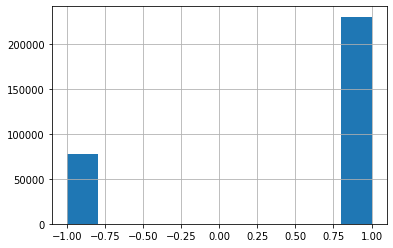

In [11]:
data_proc["Rating"].hist()

---

### II. Balancing class distribution <a id='balance'></a>

#### Imbalance Dataset (Undersampling)

In [12]:
# Shuffle the Dataset.
shuffled_df = data_proc.sample(frac=1,random_state=4)

In [13]:
# Put all the fraud class in a separate dataset.
negative_review_df = shuffled_df.loc[shuffled_df['Rating'] == -1]

In [14]:
#Randomly select 492 observations from the non-fraud (majority class)
positive_review_df = shuffled_df.loc[shuffled_df['Rating'] == 1].sample(n=100000,random_state=42)

In [15]:
# Concatenate both dataframes again
data_proc_balanced = pd.concat([negative_review_df, positive_review_df])

C:\Users\uib47087\Anaconda3\envs\mineria\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


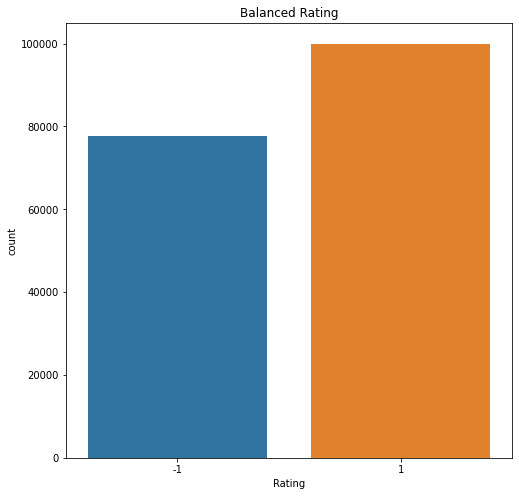

In [16]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Rating', data=data_proc_balanced)
plt.title('Balanced Rating')
plt.show()

#### Getting ready for SVM analysis

In [17]:
data_to_analyze = data_proc_balanced.sample(frac=0.25,random_state=4)

<AxesSubplot:>

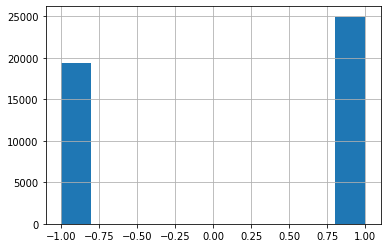

In [18]:
data_to_analyze["Rating"].hist()

---

### III. Vectorization <a id='vect'></a>

#### Using TfidfVectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif, chi2

In [20]:
vectorizer = TfidfVectorizer(sublinear_tf= True, max_df=0.5, stop_words="english")

In [21]:
documents = np.array(data_to_analyze["Reviews"])

In [22]:
vectors = vectorizer.fit_transform(documents)

In [23]:
X = vectors
y = data_to_analyze["Rating"]

In [24]:
X

<44401x26902 sparse matrix of type '<class 'numpy.float64'>'
	with 707178 stored elements in Compressed Sparse Row format>

#### Using Custom TfidfVectorizer

#### Using CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
count_vectorizer = CountVectorizer()
vectors2 = count_vectorizer.fit_transform(documents)

In [27]:
X2 = vectors2
X2

<44401x27206 sparse matrix of type '<class 'numpy.int64'>'
	with 1257794 stored elements in Compressed Sparse Row format>

--- 

### IV. Data Splitting <a id='split'></a>

In [28]:
from sklearn.model_selection import train_test_split

Using the vectors from the Standard Tfidf

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Using the vectors from the Count Vectorizer

In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25, random_state = 0)

--- 

### IV. Data Modeling <a id='model'></a>

In [31]:
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

SVC(random_state=0)

**Notes**
GridSearch VS Bayesian: Recommended: Bayesian. Aplicate Bayesian algorithm. Parameters Optimization(e.g. c, gama, sigma for the kernel used, hyperparameter as well.)

In [32]:
classifier2 = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier2.fit(X2_train, y2_train)

SVC(random_state=0)

---

### V. Classification <a id='class'></a>

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
y_pred

array([-1, -1,  1, ...,  1,  1, -1], dtype=int64)

In [35]:
results = pd.DataFrame(y_test)
results.rename(columns={"Rating":"Rating_test"}, inplace=True)

In [36]:
results["Rating_predicted"] = y_pred

In [37]:
results

,Rating_test,Rating_predicted
146313,-1,-1
206579,-1,-1
177671,1,1
109771,1,1
347801,1,1
...,...,...
411953,1,1
226219,1,1
372587,1,1
13617,1,1


In [38]:
predicted = len(results[results["Rating_test"] == results["Rating_predicted"]])
print("Predicted acurately: {0} ratio: {1}".format(predicted, predicted / len(results)))

Predicted acurately: 10387 ratio: 0.9356814701378254


In [39]:
no_predicted = len(results[results["Rating_test"] != results["Rating_predicted"]])
print("Predicted acurately: {0} ratio: {1}".format(no_predicted, no_predicted / len(results)))

Predicted acurately: 714 ratio: 0.06431852986217458


For the other vectors...

In [40]:
# Predicting the Test set results
y2_pred = classifier2.predict(X2_test)

--- 

### VI. Model Performance <a id='auc'></a>

#### ROC Curve

In [41]:
from sklearn.metrics import RocCurveDisplay

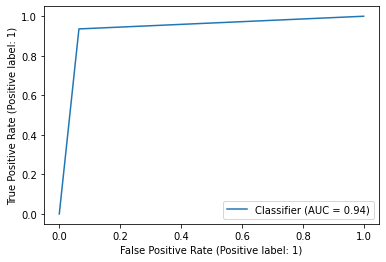

In [42]:
RocCurveDisplay.from_predictions(y_test, y_pred)

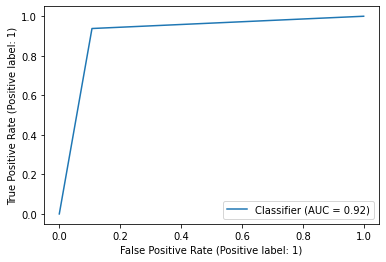

In [43]:
RocCurveDisplay.from_predictions(y2_test, y2_pred)

#### AUC

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
auc = roc_auc_score(y_test, y_pred)
auc

0.935660684476294

In [46]:
auc2 = roc_auc_score(y2_test, y2_pred)
auc2

0.915271243178675

#### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, y_pred)

array([[4582,  316],
       [ 398, 5805]], dtype=int64)

In [49]:
confusion_matrix(y2_test, y2_pred)

array([[4372,  526],
       [ 385, 5818]], dtype=int64)

--- 

---

### VII. Conclusion - Notes - Comments <a id='bott'></a>

Please add your coments in this section, this can also be used as a changelog if desired. Just comment what you change and the date, so all the team can be aware of the notebook evolution.

* Added HTML formatting and Performance Metrics Options - C. Ramos - 23/11/2021

    Altough all metrics are useful, it might be a good idea to validate with the professor if we need an specific one for our case.

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="false" style="background-color:#004270; color:white; float: right;" data-toggle="popover" title="Inicio" align="right">Regresar al inicio</a>